SMA(Simple Moving Average)

In [5]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2024-12-17 11:57:22--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘sp500_close.csv’

sp500_close.csv     100%[===================>]   3.95M  4.79MB/s    in 0.8s    

2024-12-17 11:57:24 (4.79 MB/s) - ‘sp500_close.csv’ saved [4143332/4143332]



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
close = pd.read_csv("sp500_close.csv",index_col = 0,parse_dates = True)

In [8]:
pd.set_option("display.max_columns",None)

In [9]:
close.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,ADS,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALLE,ALL,ALXN,AMAT,AMD,AME,AMGN,AMG,AMP,AMT,AMZN,ANDV,ANSS,ANTM,AON,AOS,APA,APC,APD,APH,APTV,ARE,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,AZO,A,BAC,BAX,BA,BBT,BBY,BDX,BEN,BF.B,BHF,BHGE,BIIB,BK,BLK,BLL,BMY,BRK.B,BSX,BWA,BXP,CAG,CAH,CAT,CA,CBG,CBOE,CBS,CB,CCI,CCL,CDNS,CELG,CERN,CFG,CF,CHD,CHK,CHRW,CHTR,CINF,CI,CLX,CL,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COL,COO,COP,COST,COTY,CPB,CRM,CSCO,CSRA,CSX,CTAS,CTL,CTSH,CTXS,CVS,CVX,CXO,C,DAL,DE,DFS,DGX,DG,DHI,DHR,DISCA,DISCK,DISH,DIS,DLR,DLTR,DOV,DPS,DRE,DRI,DTE,DUK,DVA,DVN,DWDP,DXC,D,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,EQT,ESRX,ESS,ES,ETFC,ETN,ETR,EVHC,EW,EXC,EXPD,EXPE,EXR,FAST,FBHS,FB,FCX,FDX,FE,FFIV,FISV,FIS,FITB,FLIR,FLR,FLS,FL,FMC,FOXA,FOX,FRT,FTI,FTV,F,GD,GE,GGP,GILD,GIS,GLW,GM,GOOGL,GOOG,GPC,GPN,GPS,GRMN,GS,GT,GWW,HAL,HAS,HBAN,HBI,HCA,HCN,HCP,HD,HES,HIG,HII,HLT,HOG,HOLX,HON,HPE,HPQ,HP,HRB,HRL,HRS,HSIC,HST,HSY,HUM,IBM,ICE,IDXX,IFF,ILMN,INCY,INFO,INTC,INTU,IPG,IP,IQV,IRM,IR,ISRG,ITW,IT,IVZ,JBHT,JCI,JEC,JNJ,JNPR,JPM,JWN,KEY,KHC,KIM,KLAC,KMB,KMI,KMX,KORS,KO,KR,KSS,KSU,K,LB,LEG,LEN,LH,LKQ,LLL,LLY,LMT,LNC,LNT,LOW,LRCX,LUK,LUV,LYB,L,MAA,MAC,MAR,MAS,MAT,MA,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MLM,MMC,MMM,MNST,MON,MOS,MO,MPC,MRK,MRO,MSFT,MSI,MS,MTB,MTD,MU,MYL,M,NAVI,NBL,NCLH,NDAQ,NEE,NEM,NFLX,NFX,NI,NKE,NLSN,NOC,NOV,NRG,NSC,NTAP,NTRS,NUE,NVDA,NWL,NWSA,NWS,OKE,OMC,ORCL,ORLY,OXY,O,PAYX,PBCT,PCAR,PCG,PCLN,PDCO,PEG,PEP,PFE,PFG,PGR,PG,PHM,PH,PKG,PKI,PLD,PM,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PXD,PX,PYPL,QCOM,QRVO,RCL,REGN,REG,RE,RF,RHI,RHT,RJF,RL,RMD,ROK,ROP,ROST,RRC,RSG,RTN,SBAC,SBUX,SCG,SCHW,SEE,SHW,SIG,SJM,SLB,SLG,SNA,SNI,SNPS,SO,SPGI,SPG,SRCL,SRE,STI,STT,STX,STZ,SWKS,SWK,SYF,SYK,SYMC,SYY,TAP,TDG,TEL,TGT,TIF,TJX,TMK,TMO,TPR,TRIP,TROW,TRV,TSCO,TSN,TSS,TWX,TXN,TXT,T,UAA,UAL,UA,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,UTX,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,V,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WMB,WMT,WM,WRK,WU,WYNN,WYN,WY,XEC,XEL,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,60.925,38.89,154.08,32.61,44.57,11.07,50.60,50.35,87.45,38.79,28.57,38.56,37.97,35.42,62.66,32.73,24.335,NaN,45.14,93.66,13.61,2.59,41.46,86.77,146.45,66.49,77.06,261.95,53.86,74.69,66.28,56.53,17.4875,84.65,84.45,88.35,35.220,NaN,72.62,26.82,13.41,128.84,35.32,39.25,39.18,61.80,70.09,385.89,45.08,11.760,69.00,76.56,30.65,15.29,88.25,46.7333,32.54,NaN,NaN,164.44,27.90,238.16,22.680,37.03,97.25,7.70,37.470,105.14,33.38,45.18,96.85,25.02,24.19,34.46,42.83,86.20,70.79,39.01,14.16,50.065,44.050,NaN,45.232,30.065,20.23,59.72,80.89,44.61,61.93,80.73,54.245,35.37,19.375,57.27,320.72,119.47,25.66,23.02,20.91,57.27,27.45,60.49,104.26,57.87,102.79,NaN,37.93,42.4875,21.16,NaN,21.97,42.87,41.36,39.365,72.91,51.20,115.64,96.15,42.68,14.62,92.81,39.88,58.50,46.00,23.08,60.81,71.47,64.60,37.64,54.66,65.40,41.06,71.13,45.73,16.07,47.36,64.28,69.00,59.460,60.42,NaN,NaN,54.31,17.37,56.62,74.40,57.15,55.56,47.84,62.75,73.31,57.50,66.64,219.71,55.44,61.83,55.74,151.86,41.11,11.02,58.92,64.47,NaN,43.610,31.08,43.34,65.65,40.28,50.69,33.61,28.545,35.64,106.41,40.22,105.25,40.24,37.62,16.61,26.50,63.71,52.5799,34.85,59.82,NaN,NaN,107.76,48.62,NaN,13.10,66.82,22.50,20.14,40.90,42.60,12.28,28.57,393.0777,NaN,69.92,24.970,32.23,38.08,151.60,13.59,216.71,41.26,39.84,7.20,10.1275,37.22,62.30,46.70,67.01,67.37,24.17,45.39,NaN,52.86,22.32,70.53,NaN,NaN,64.39,24.40,17.915,46.62,44.555,16.81,80.21,81.35,201.68,29.800,46.785,73.60,50.88,18.32,NaN,21.00,61.51,12.16,42.60,NaN,34.25,53.43,192.9165,62.72,49.75,27.31,69.07,32.2094,48.08,75.48,21.84,48.63,55.82,9.57,NaN,21.55,56.57,90.9,37.60,39.77,57.1,38.77,14.100,46.01,95.09,58.91,45.81,29.74,39.1765,90.24,23.73,77.67,53.72,88.01,29.43,23.190,39.03,42.61,26.73,11.64,62.11,43.85,66.48,61.64,40.97,17.79,40.32,52.447,94.87,36.39,103.80,43.37,27.76,47.10,36.90,13.51,103.11,63.63,98.27,36.55,102.66,15.6133,1

In [10]:
goog = close[["GOOG"]].copy().dropna()

In [11]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


<Axes: >

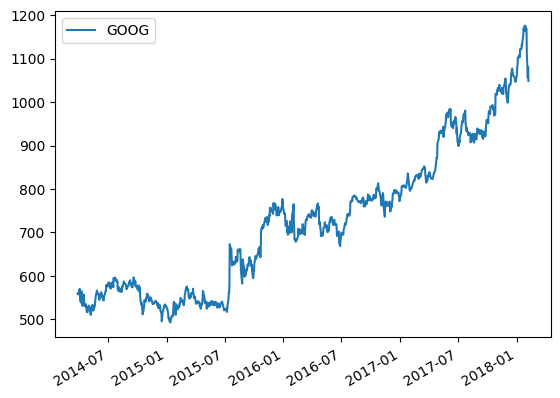

In [12]:
goog.plot()

## Calculating the log returns of the Google

In [13]:
goog_ret = np.log(goog.pct_change(1)+1)

In [14]:
goog_ret

,GOOG
2014-03-27,NaN
2014-03-28,0.002736
2014-03-31,-0.005408
2014-04-01,0.018130
2014-04-02,-0.000282
...,...
2018-02-01,-0.001916
2018-02-02,-0.048966
2018-02-05,-0.051771
2018-02-06,0.023218


<Axes: >

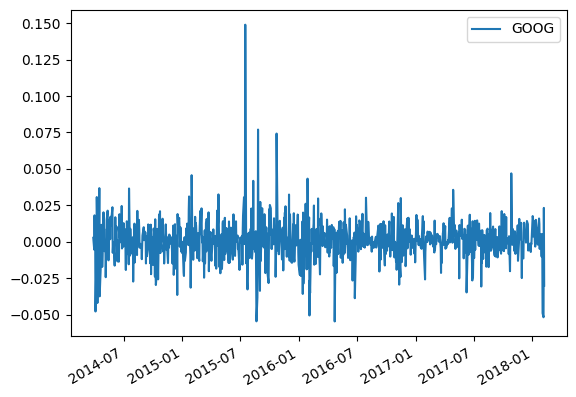

In [15]:
goog_ret.plot()

In [16]:
## rolling function is used to calculate the moving average of the given window size in the stock prices
goog["SMA-10"] = goog["GOOG"].rolling(10).mean()

In [17]:
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


## Lets check the type of the output returned by the rolling function

In [18]:
type(goog["GOOG"].rolling(10))

pandas.core.window.rolling.Rolling

<Axes: >

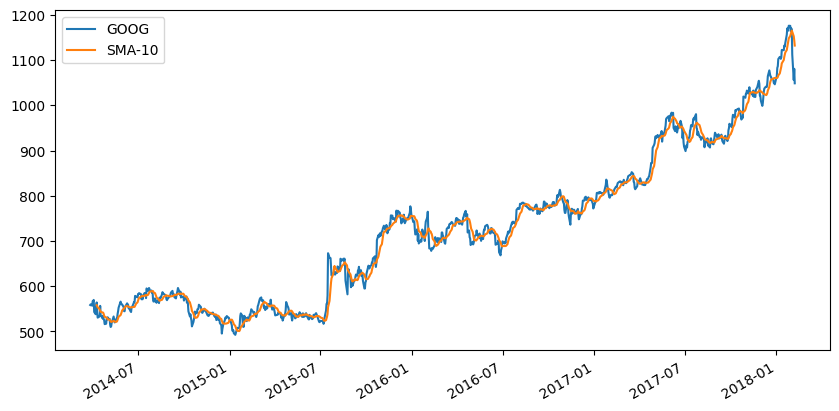

In [19]:
goog.plot(figsize = (10,5))

<Axes: >

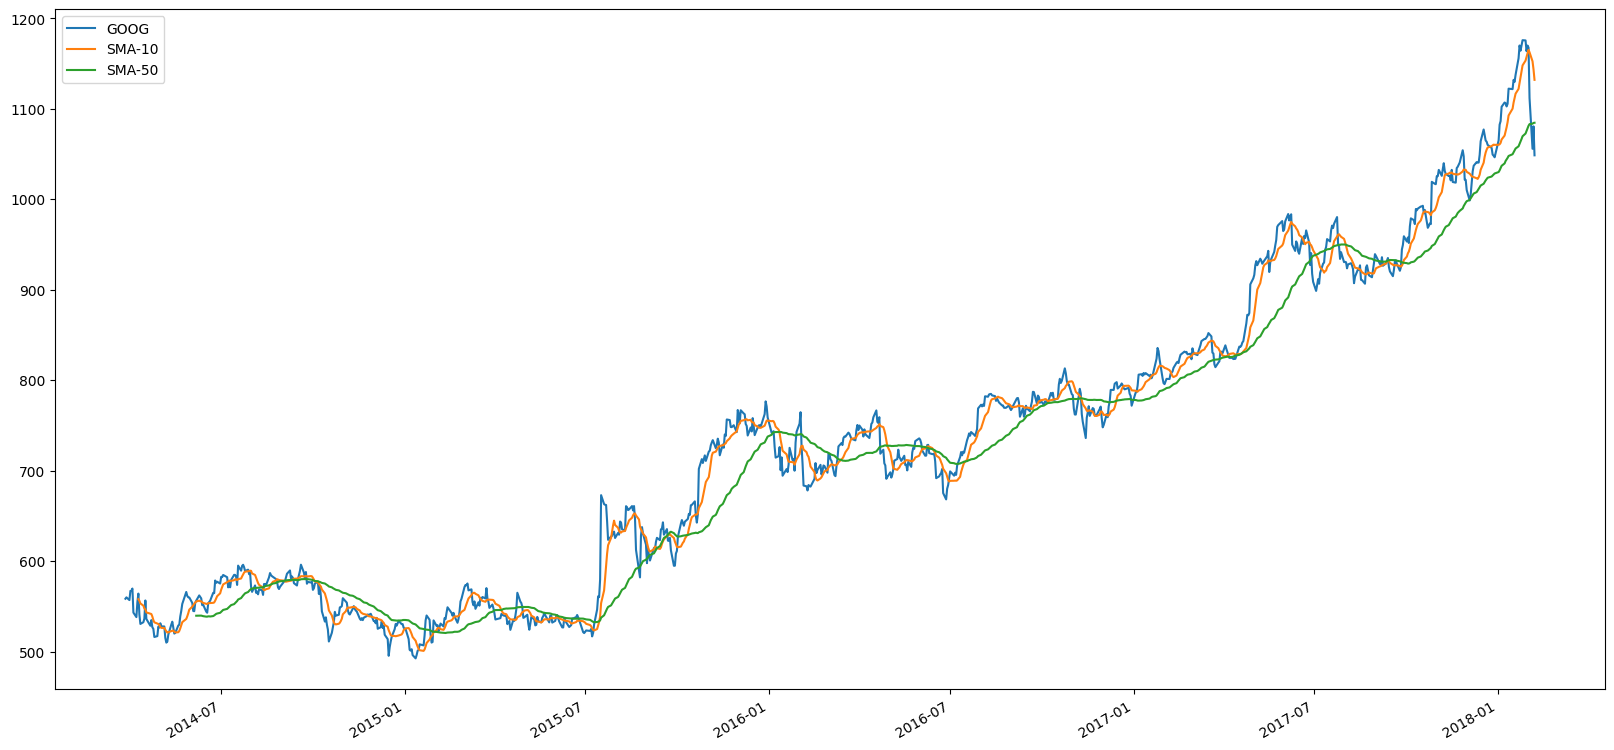

In [20]:

goog["SMA-50"] = goog["GOOG"].rolling(50).mean()

goog.plot(figsize=(20,10))

## select both the google and apple stock to analyse

In [21]:
goog_appl = close[["GOOG","AAPL"]].copy().dropna()

In [22]:
goog_appl.head()

,GOOG,AAPL
2014-03-27,558.46,76.7799
2014-03-28,559.99,76.6942
2014-03-31,556.97,76.6771
2014-04-01,567.16,77.3785
2014-04-02,567.00,77.5071


In [23]:
## Calculating the covariance

cov = goog_appl.rolling(50).cov()

In [24]:
cov.head(50)

GOOG  AAPL
2014-03-27 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-03-28 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-03-31 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-01 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-02 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-03 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-04 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-07 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-08 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-09 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-10 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-11 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-14 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-15 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-16 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-17 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-21 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-22 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-23 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-24 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-25 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-28 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-29 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-04-30 GOOG   NaN   NaN
           AAPL   NaN   NaN
2014-05-01 GOOG   NaN   NaN
           AAPL   NaN   NaN

In [25]:
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [26]:
goog_app_ret = np.log(goog_appl.pct_change(1)+1)

In [27]:
goog_app_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [28]:
goog_app_ret["SMP-GOOG-50"] = goog_app_ret["GOOG"].rolling(50).mean()
goog_app_ret["SMP-AAPL-50"] = goog_app_ret["AAPL"].rolling(50).mean()

<Axes: >

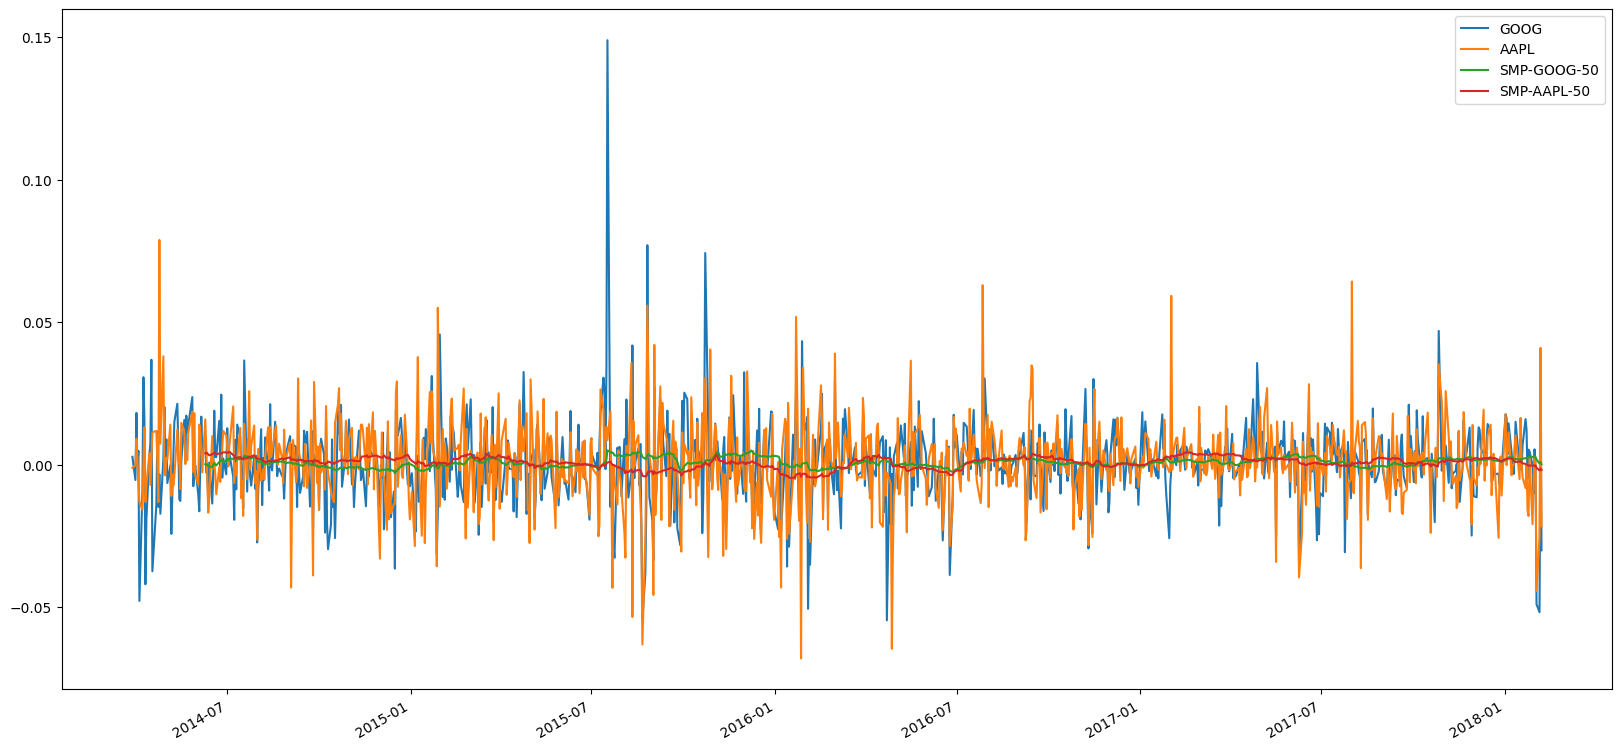

In [29]:
goog_app_ret.plot(figsize = (20,10))

## Calculating the rolling covariance of the returns

In [30]:
cov = goog_app_ret[["SMP-GOOG-50","SMP-AAPL-50"]].rolling(50).cov()
cov.tail()

SMP-GOOG-50   SMP-AAPL-50
2018-02-05 SMP-AAPL-50 -7.715772e-08  1.188405e-06
2018-02-06 SMP-GOOG-50  2.852362e-07 -1.882949e-08
           SMP-AAPL-50 -1.882949e-08  1.329746e-06
2018-02-07 SMP-GOOG-50  3.430702e-07  8.238184e-08
           SMP-AAPL-50  8.238184e-08  1.506869e-06

In [31]:
corr = goog_app_ret[["SMP-GOOG-50","SMP-AAPL-50"]].rolling(50).corr()
corr.tail()

SMP-GOOG-50  SMP-AAPL-50
2018-02-05 SMP-AAPL-50    -0.138433     1.000000
2018-02-06 SMP-GOOG-50     1.000000    -0.030574
           SMP-AAPL-50    -0.030574     1.000000
2018-02-07 SMP-GOOG-50     1.000000     0.114578
           SMP-AAPL-50     0.114578     1.000000

# Exponential Weightage Moving Average(EWMA)

In [32]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2024-12-17 11:57:30--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2024-12-17 11:57:30 (27.2 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [33]:
df = pd.read_csv("airline_passengers.csv",index_col = "Month",parse_dates = True)

In [34]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [35]:
df.isna().sum()

,0
Passengers,0


<Axes: xlabel='Month'>

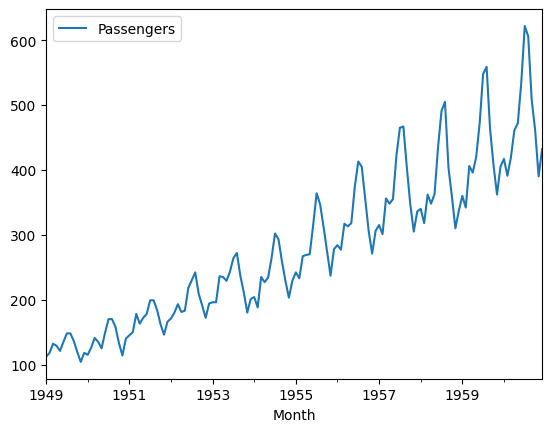

In [36]:
df.plot()

In [37]:
alpha = 0.2

In [38]:
df["EWMA"] = df["Passengers"].ewm(alpha = alpha,adjust=False).mean()

In [39]:
type(df["Passengers"].ewm(alpha = alpha,adjust=False))

pandas.core.window.ewm.ExponentialMovingWindow

<Axes: xlabel='Month'>

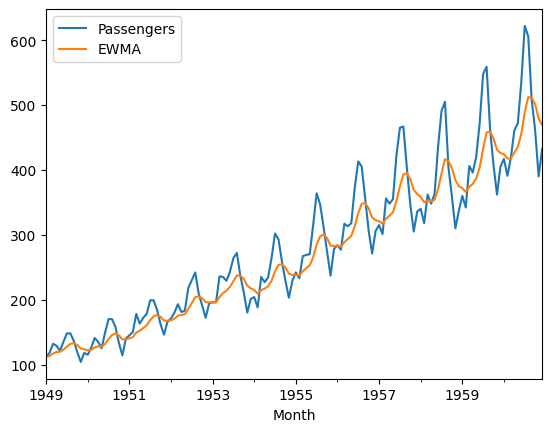

In [40]:
df.plot()

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:
hw = ExponentialSmoothing(df["Passengers"],initialization_method  ='legacy-heuristic',trend = "add",seasonal = "add",seasonal_periods = 12)


In [44]:
res_hw = hw.fit()

In [ ]:
df.loc[]